In [25]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [26]:
# Load the dataset
df = pd.read_csv("fer2013_images.csv")
print(df['label'].unique())

['sad' 'neutral' 'fear' 'surprise' 'angry' 'happy' 'disgust']


✅ X shape: (28709, 48, 48, 3)
✅ y shape: (28709,)


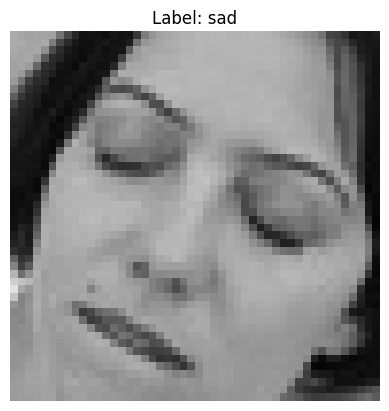

In [40]:
# Load and preprocess all images
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 48
X = []
y = []

for idx, row in df.iterrows():
    # ✅ Remove extra 'fer2013_dataset/' part if present
    relative_path = row['filepath'].replace("fer2013_dataset/", "")
    img_path = os.path.join(base_path, relative_path)
    label = row['label']

    img = cv2.imread(img_path)
    if img is None:
        print("Missing:", img_path)  # Debug missing files
        continue

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # Normalize
    X.append(img)
    y.append(label)

X = np.array(X)
y = np.array(y)

print("✅ X shape:", X.shape)
print("✅ y shape:", y.shape)

# ✅ Display the first image to verify
if X.shape[0] > 0:
    plt.imshow(X[0])
    plt.title(f"Label: {y[0]}")
    plt.axis('off')
    plt.show()
    

In [41]:
# One - hot encode the labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ⿡ Encode string labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)   # 'sad' -> 4, 'happy' -> 3, etc.

# ⿢ Convert to one-hot
num_classes = len(label_encoder.classes_)
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

print("Encoded y shape:", y_onehot.shape)
print("Classes:", label_encoder.classes_)

Encoded y shape: (28709, 7)
Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [42]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Define CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential()

# ✅ Add an explicit Input layer
model.add(Input(shape=(48, 48, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,423 (1.36 MB)

 Trainable params: 356,423 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
# ⿡ Encode string labels to integers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)   # Converts ['angry','happy'] -> [0,3,...]

# ⿢ Convert to one-hot encoding
num_classes = len(label_encoder.classes_)
y_onehot = to_categorical(y_encoded, num_classes=num_classes)

print("✅ Classes:", label_encoder.classes_)
print("✅ y_onehot shape:", y_onehot.shape)

# ⿣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

print("✅ X_train:", X_train.shape, " y_train:", y_train.shape)
print("✅ X_test:", X_test.shape, " y_test:", y_test.shape)

# ⿤ Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ⿥ Train model
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

✅ Classes: ['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']
✅ y_onehot shape: (28709, 7)
✅ X_train: (22967, 48, 48, 3)  y_train: (22967, 7)
✅ X_test: (5742, 48, 48, 3)  y_test: (5742, 7)
Epoch 1/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.2551 - loss: 1.7992 - val_accuracy: 0.3979 - val_loss: 1.5329
Epoch 2/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4169 - loss: 1.5131 - val_accuracy: 0.4718 - val_loss: 1.3692
Epoch 3/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.4704 - loss: 1.3833 - val_accuracy: 0.4981 - val_loss: 1.3041
Epoch 4/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5107 - loss: 1.2924 - val_accuracy: 0.5094 - val_loss: 1.2719
Epoch 5/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5259 - loss: 1.2406 - val_accuracy: 0.5272 - val_loss: 1.2351
Epoch 6/15
718/718 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.5424 - loss: 1.1961 - val_accuracy: 0.5362 - val_loss: 1.2233
Epoch 7/15
718/718 ━

In [56]:
# Save the model
model.save("my_cnn_mode_fer.keras")

In [61]:
# Load the model later
from tensorflow.keras.models import load_model
model = load_model("my_cnn_mode_fer.keras")